# Testing Image Preprocessing Pipeline
Note: Use TIFF library to open files (RGBA will not display the channels correctly)

In [1]:
from image_preprocessing import PreprocessImage
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import time
from skimage import io, exposure

### Using actual image

(4, 2189, 2189)
Channel 0: min=41, max=328, dtype=uint16
  Rescaled: min=0, max=255
Channel 1: min=56, max=430, dtype=uint16
  Rescaled: min=0, max=255
Channel 2: min=60, max=367, dtype=uint16
  Rescaled: min=0, max=255
Channel 3: min=90, max=1635, dtype=uint16
  Rescaled: min=0, max=255


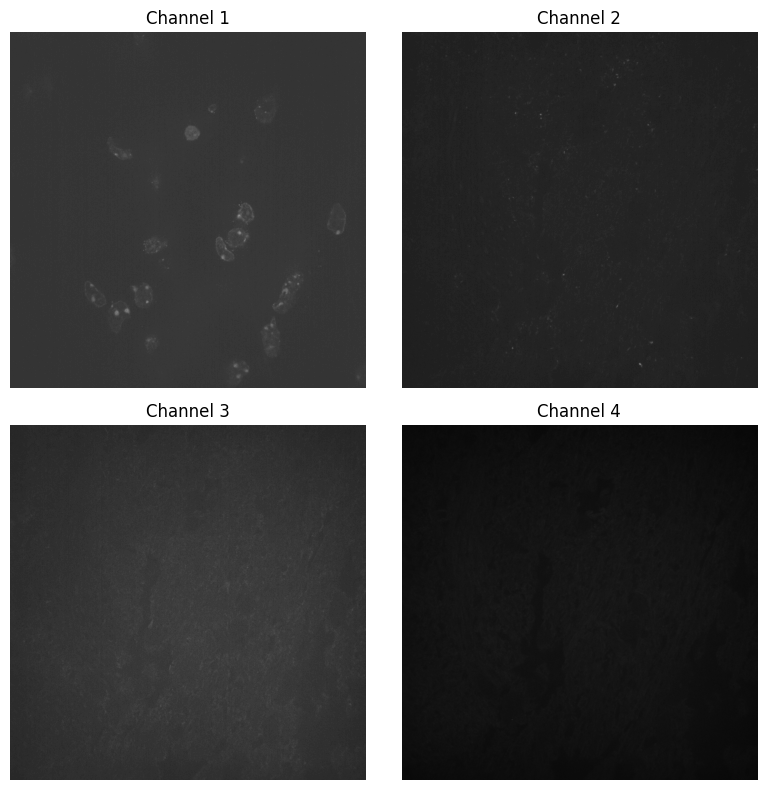

In [2]:
# load tif and view
tif_path = "images/test_images/A1_FOV01_Z100.tif"
im_array = tiff.imread(tif_path)
print(im_array.shape)

# rescale each channel independently
im_rescaled = np.zeros_like(im_array)
for i in range(4):
    im_rescaled[i] = exposure.rescale_intensity(im_array[i], out_range='uint8')

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()

# plot each channel
for i in range(4):
    ax = axes[i]
    ax.imshow(im_rescaled[i, :, :], cmap='gray')
    print(f"Channel {i}: min={im_array[i].min()}, max={im_array[i].max()}, dtype={im_array[i].dtype}")
    print(f"  Rescaled: min={im_rescaled[i].min()}, max={im_rescaled[i].max()}")
    ax.set_title(f'Channel {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Regular preprocessing

Channel 0: Corrected (range=34.00)


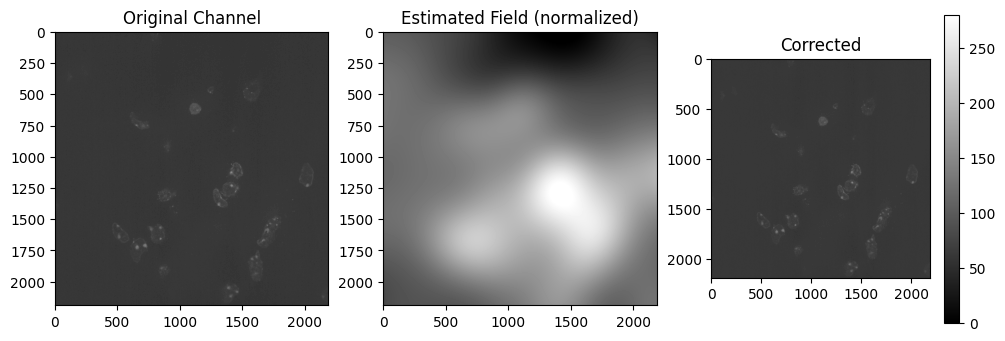

Channel 1: Corrected (range=38.00)


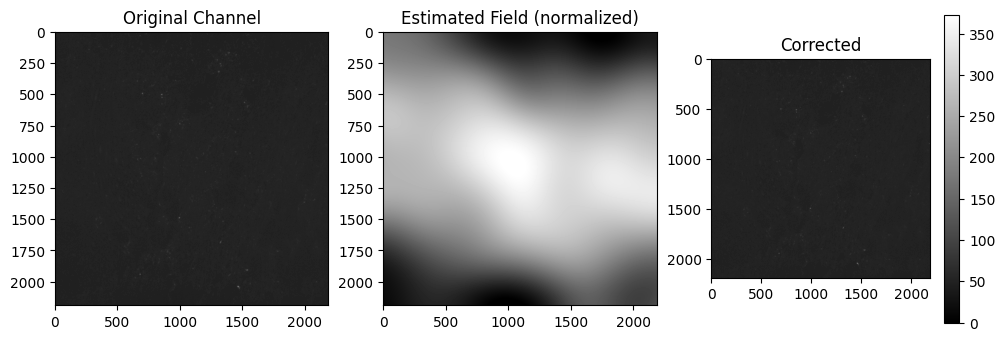

Channel 2: Corrected (range=59.00)


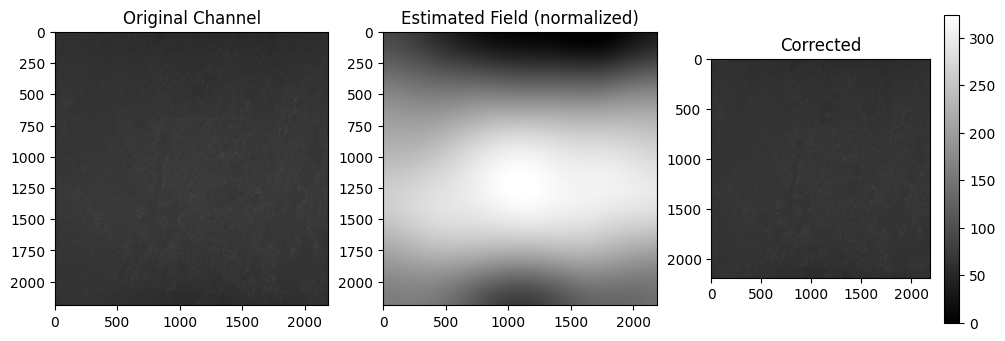

Channel 3: Corrected (range=127.00)


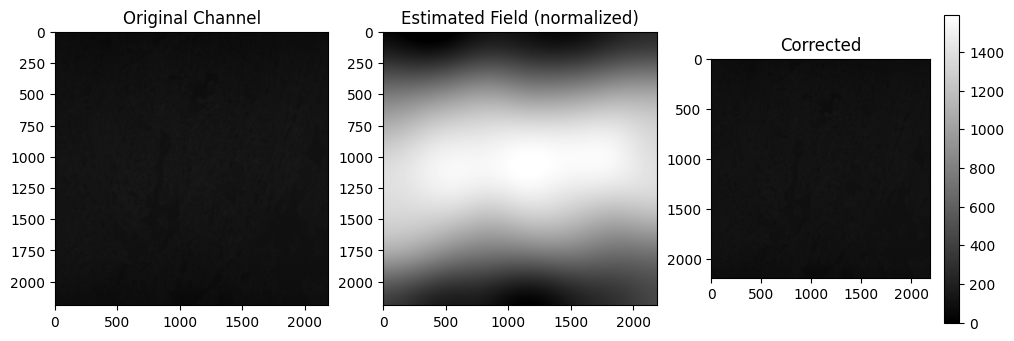

Processing channel 0
Processing channel 1
Processing channel 2
Processing channel 3


In [3]:
processed = PreprocessImage(im_array, plot=True)

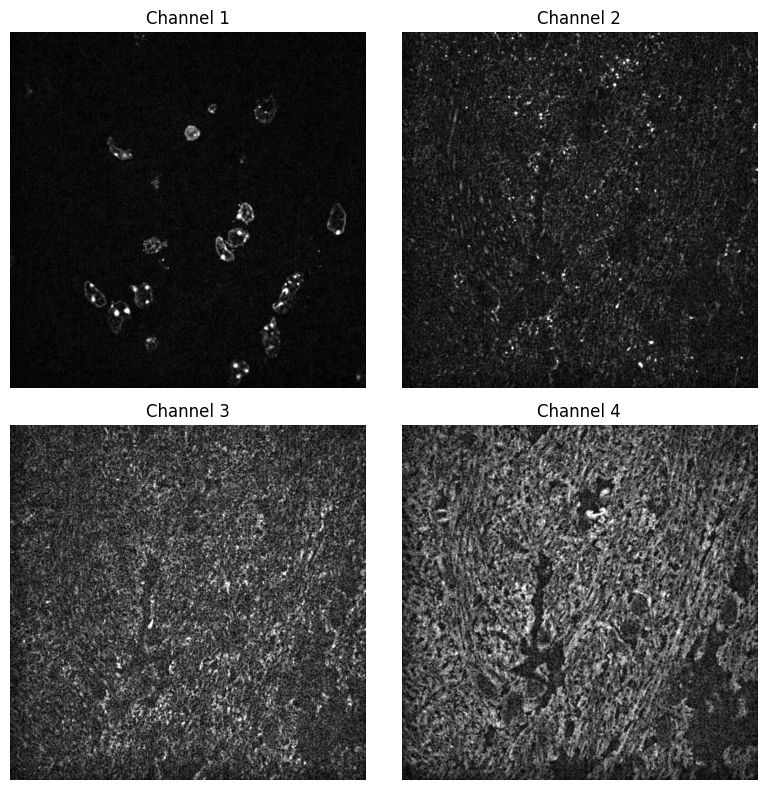

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()  # Flatten to easily iterate

# Plot each channel
for i in range(4):
    ax = axes[i]
    ax.imshow(processed[i, :, :,], cmap='gray')
    ax.set_title(f'Channel {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

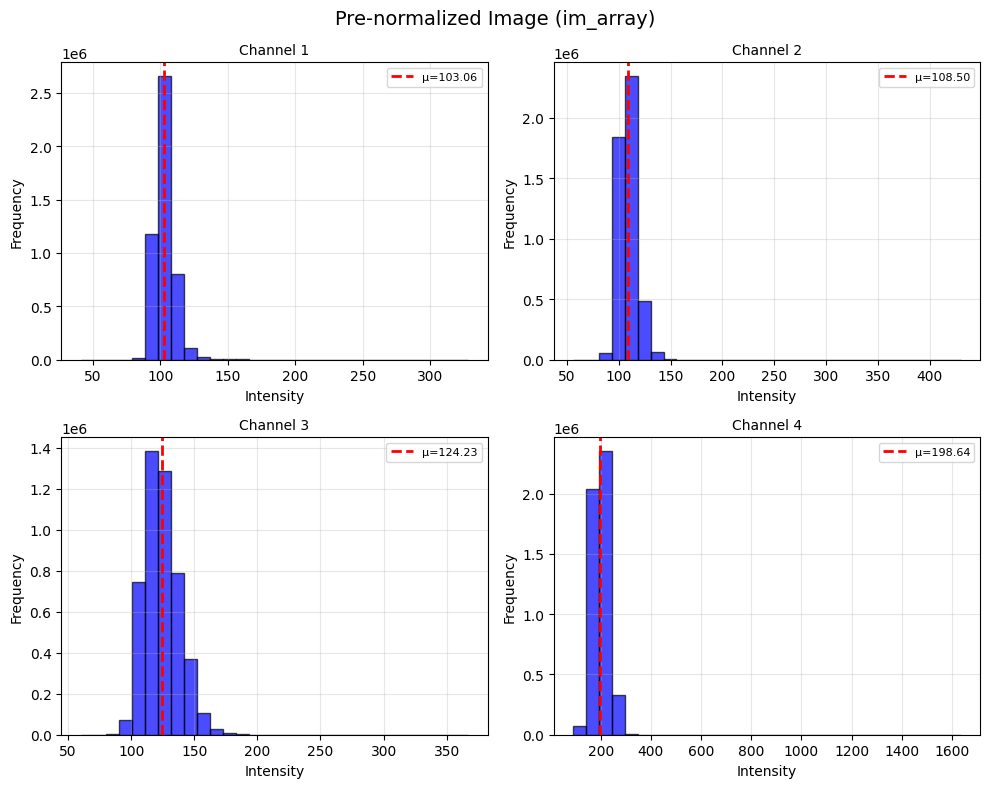

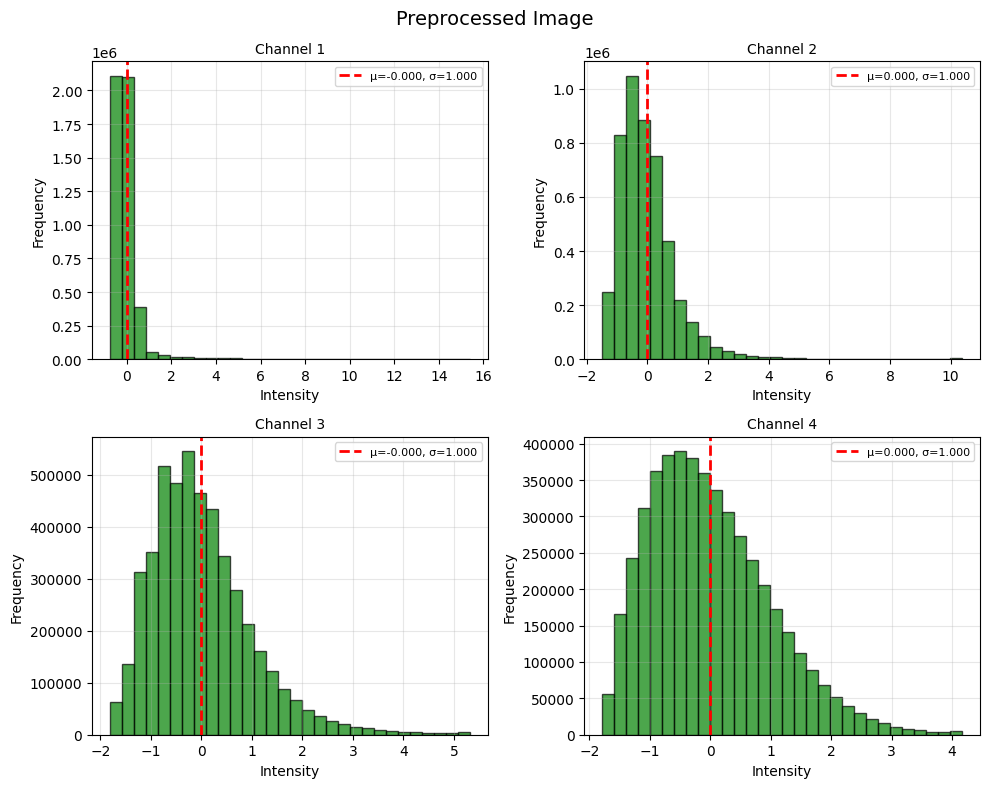

In [8]:
# Plot im_array (pre-normalized)
fig1, axes1 = plt.subplots(2, 2, figsize=(10, 8))
fig1.suptitle('Pre-normalized Image (im_array)', fontsize=14)

for i in range(4):
    row = i // 2
    col = i % 2
    channel_data = im_array[i].flatten()
    
    axes1[row, col].hist(channel_data, bins=30, color='blue', alpha=0.7, edgecolor='black')
    axes1[row, col].set_title(f'Channel {i+1}', fontsize=10)
    axes1[row, col].set_xlabel('Intensity')
    axes1[row, col].set_ylabel('Frequency')
    axes1[row, col].grid(True, alpha=0.3)
    
    mean_val = np.mean(channel_data)
    axes1[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                           label=f'μ={mean_val:.2f}')
    axes1[row, col].legend(fontsize=8)

plt.tight_layout()
plt.show()

# Plot processed (z-score normalized)
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))
fig2.suptitle('Preprocessed Image', fontsize=14)

for i in range(4):
    row = i // 2
    col = i % 2
    channel_data = processed[i].flatten()
    
    axes2[row, col].hist(channel_data, bins=30, color='green', alpha=0.7, edgecolor='black')
    axes2[row, col].set_title(f'Channel {i+1}', fontsize=10)
    axes2[row, col].set_xlabel('Intensity')
    axes2[row, col].set_ylabel('Frequency')
    axes2[row, col].grid(True, alpha=0.3)
    
    mean_val = np.mean(channel_data)
    std_val = np.std(channel_data)
    axes2[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                           label=f'μ={mean_val:.3f}, σ={std_val:.3f}')
    axes2[row, col].legend(fontsize=8)

plt.tight_layout()
plt.show()